In [2]:
### Import needed packages ###
import pandas as pd
from pandas_datareader import data
import numpy as np
import datetime as dt
from data_reader import read_data
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import statsmodels.api as sm
plt.style.use('classic')

In [3]:
def read_data(ticker_list,start,end):
    
    """ 
    This function reads the colsing price form Yahoo Finance for each tick in
    the ticker list
    """

    
    ### generate DataFrame from ticker list ###
    
    ticker = pd.DataFrame()
    
    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Adj Close']
        ticker[tick] = closing_prices
        
    return ticker

In [4]:
### Set the ticker list the start and end time

start = dt.datetime(2000,1,2)
end = dt.datetime.today()
ticker_list = ['^GSPC']


data = read_data(ticker_list,start,end)

data.rename({'^GSPC' : 'S&P500_Adj_Close'}, axis=1)


### Calculate the retruns ###

# 1. Convert to numpy array

price = data.to_numpy()

# preallocate the return array

r = np.zeros(len(price))
r_abs = np.zeros(len(price))
r_abs_2 = np.zeros(len(price))


for t in range (1,len(price)):
    r[t] = np.log(price[t])-np.log(price[t-1])
    r_abs[t] = abs(r[t])

r_abs_2 = np.power(r_abs,2)
r_abs_3 = np.power(r_abs,3)
r_abs_4 = np.power(r_abs,4)



# ad returns to dataframe 

data['returns'] = r.tolist()
data['abs. returns'] = r_abs.tolist()
data['abs. squared returns'] = r_abs_2.tolist()
data['abs. returns ^3'] = r_abs_3.tolist()
data['abs. returns ^4'] = r_abs_4.tolist()

### safe the data to a csv file ###

data.to_csv('S&P500_data.csv',sep = ';',decimal=',')

C:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


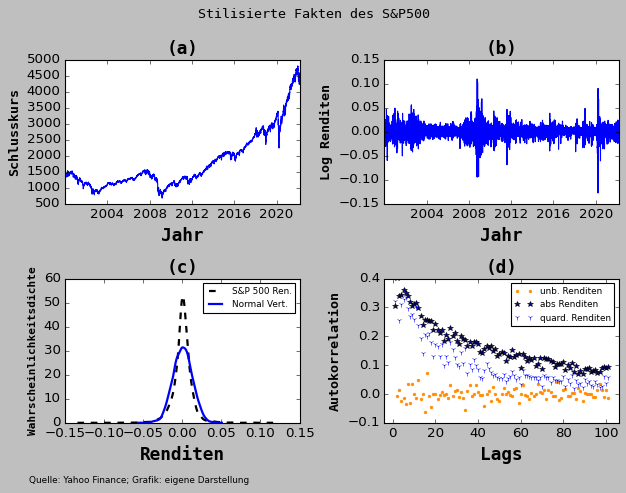

In [11]:
data = pd.read_csv('S&P500_data.csv',sep = ';',decimal=',')

data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
date = data['Date']
price = data['^GSPC']
r = data['returns']
r_abs = data['abs. returns']

### Here the Density plot and the cummulative distribution of absolute returns
# Source: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

# calulate mean and variance of the returns

r_mean = r.mean()
r_var = r.var()

pseudo_r = np.random.normal(r_mean,np.sqrt(r_var), len(price))

font = {'family': 'monospace',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }



fig, ([ax0,ax1],[ax2,ax3]) = plt.subplots(2,2)
fig.suptitle('Stilisierte Fakten des S&P500', fontdict = font)
ax0.plot(date,price,color='blue',linewidth=1)
ax0.set_title('(a)', fontdict=font)
ax0.set_xlabel('Jahr', fontdict=font)
ax0.set_ylabel('Schlusskurs', fontdict=font,fontsize = 12)

ax1.plot(date,r, color = 'blue')
ax1.set_title('(b)',fontdict=font)
ax1.set_xlabel('Jahr', fontdict=font)
ax1.set_ylabel('Log Renditen',fontdict=font,fontsize = 12)



sns.distplot(r,hist = False, kde = True, kde_kws = {'linewidth': 2,'linestyle':'--'},ax=ax2, label='S&P 500 Ren.', color='black')
sns.distplot(pseudo_r,hist = False, kde = True, kde_kws = {'linewidth': 2},ax=ax2, label = 'Normal Vert.', color = 'blue')
ax2.set_xlabel("Renditen", fontdict= font)
ax2.set_ylabel('Wahrscheinlichkeitsdichte', fontdict = font, fontsize = 10) 
ax2.set_title('(c)', fontdict = font) 
ax2.legend(loc=1, prop={'size':8})


sm.graphics.tsa.plot_acf(r, lags=101, ax= ax3,use_vlines= False, alpha = None ,zero = False ,color = 'darkorange' ,marker = '.', label = 'unb. Renditen')
sm.graphics.tsa.plot_acf(r_abs, lags=101, ax= ax3, use_vlines = False , alpha = None , zero = False, color='darkblue', marker = '*', label = 'abs Renditen')
sm.graphics.tsa.plot_acf(r_abs**2, lags=101, ax= ax3, use_vlines = False , alpha = None , zero = False, color='blue', marker = '1', label = 'quard. Renditen')
ax3.set_xlabel('Lags', fontdict = font)
ax3.set_ylabel('Autokorrelation', fontdict = font,fontsize = 12)
ax3.set_ylim((-0.1,0.4))
ax3.set_title('(d)', fontdict = font)
ax3.legend(loc=1, prop={'size':8})

plt.figtext(0.4, -0.01, "Quelle: Yahoo Finance; Grafik: eigene Darstellung", ha="right", fontsize=8)
plt.tight_layout()
plt.savefig('S&P500_Figure.png',bbox_inches = 'tight')